In [2]:
import sys
sys.path.insert(0,'../')
import os
from net.hourglass import HourglassNet
from eval.heatmap_process import post_process_heatmap
import glob
import cv2
import matplotlib.pyplot as plt
import scipy
import imageio
from top.demo import render_joints

In [3]:
num_class=14
num_stack=2
model_dir="../../trained_models/mpii_new"
model_json="net_arch.json"
epoch=2
model_weights="weights_epoch"+str(epoch)+".h5"
inres=(256, 256)
outres=(64,64)
xnet = HourglassNet(num_class, num_stack, inres, outres)
model_json=os.path.join(model_dir, model_json)
model_weights=os.path.join(model_dir, model_weights)

xnet.load_model(model_json, model_weights)

000033016.jpg


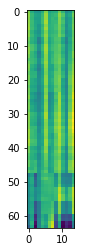

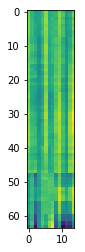

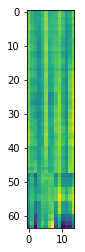

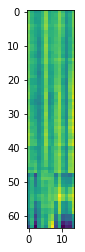

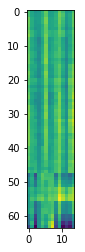

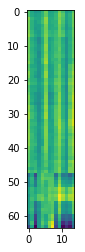

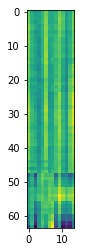

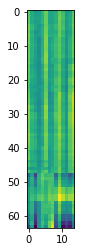

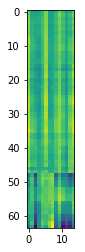

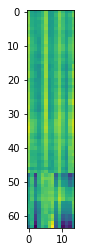

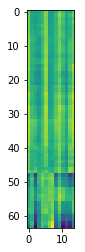

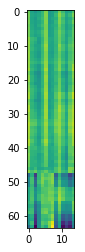

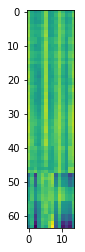

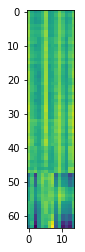

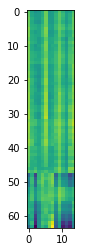

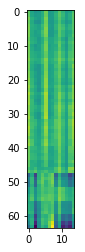

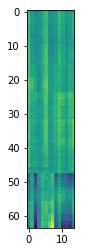

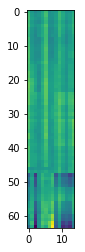

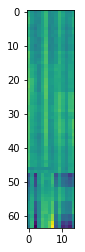

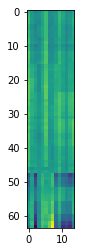

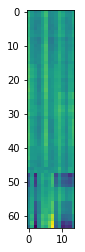

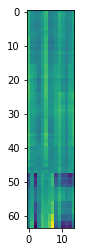

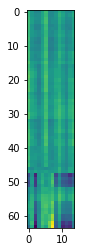

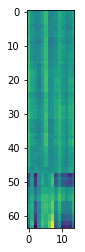

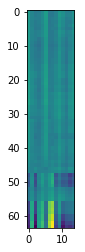

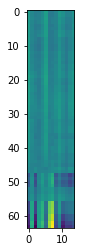

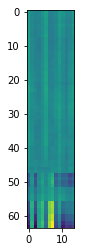

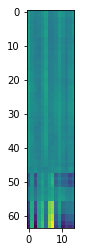

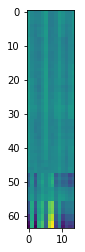

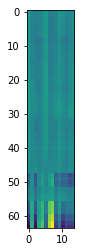

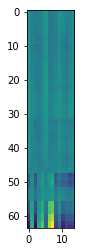

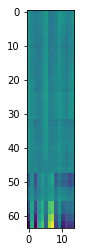

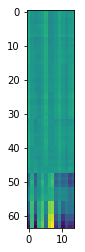

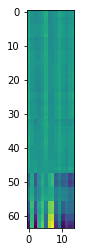

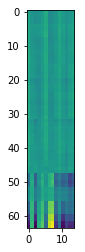

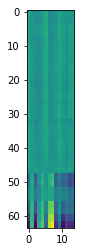

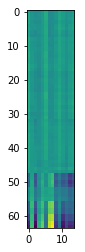

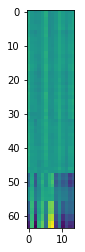

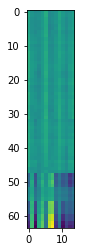

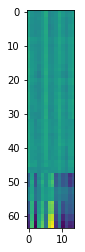

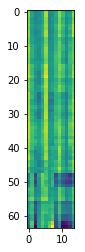

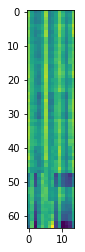

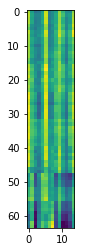

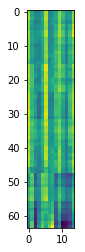

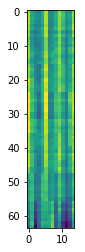

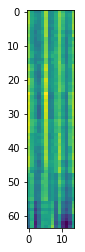

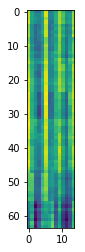

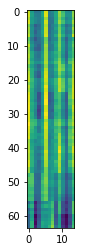

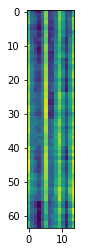

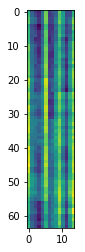

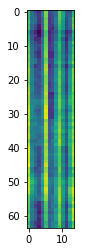

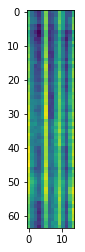

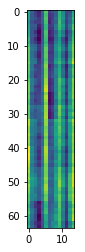

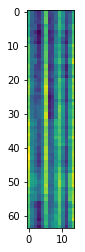

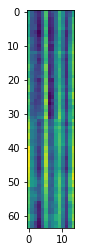

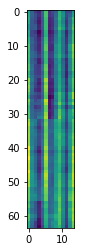

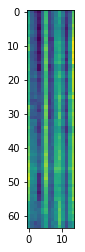

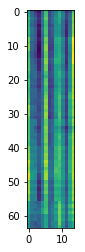

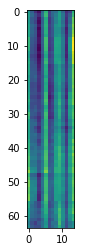

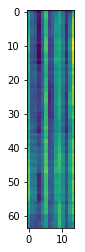

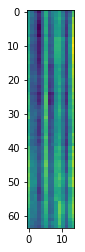

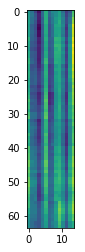

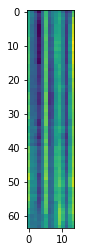

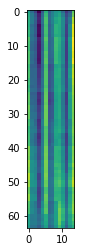

[(860.0, 607.5, 0.010113023), (1260.0, 337.5, 0.014903307), (920.0, 630.0, 0.003332935), (1260.0, 337.5, 0.01300957), (1260.0, 337.5, 0.022159802), (440.0, 596.25, 0.0089043025), (1260.0, 337.5, 0.03378632), (1260.0, 337.5, 0.04363946), (920.0, 630.0, 0.0063584074), (1100.0, 45.0, 0.010736547), (1080.0, 78.75, 0.0074199215), (1080.0, 78.75, 0.0039869486), (1080.0, 56.25, 0.0066776257), (200.0, 652.5, 0.012537868)]


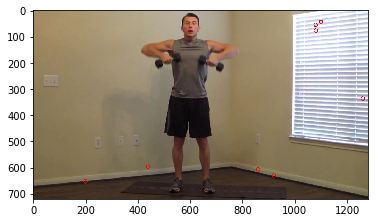

yoga2.jpg


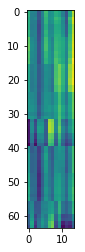

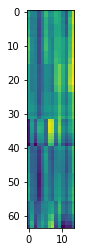

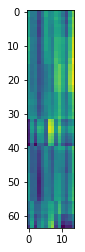

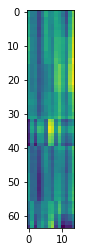

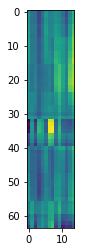

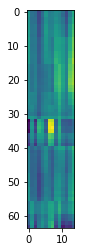

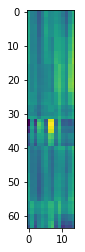

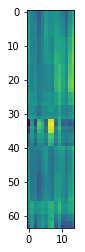

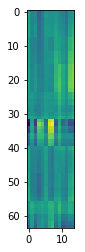

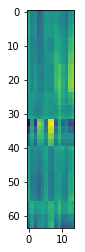

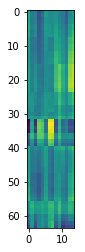

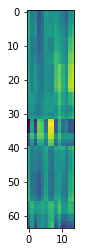

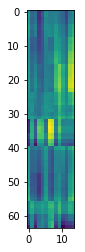

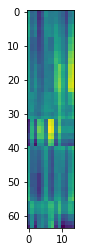

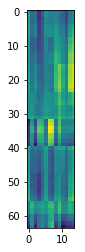

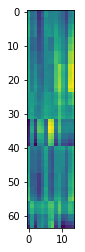

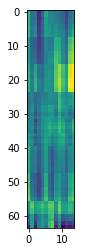

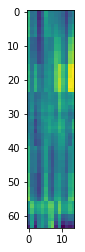

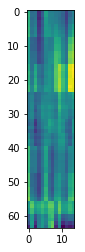

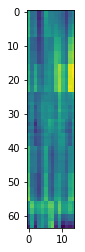

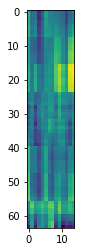

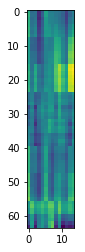

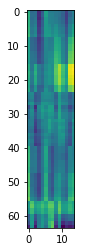

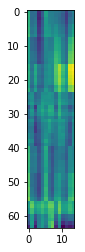

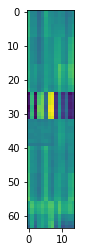

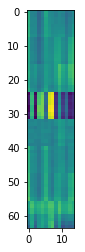

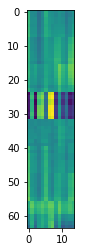

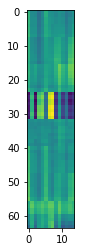

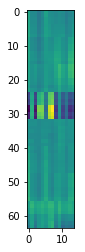

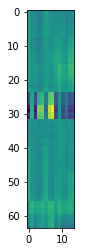

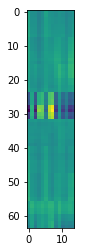

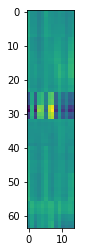

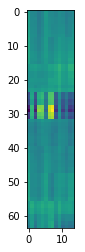

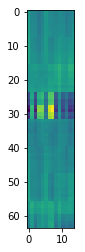

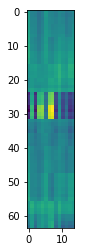

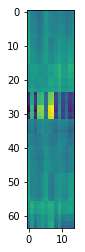

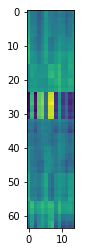

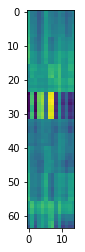

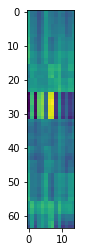

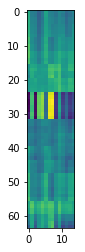

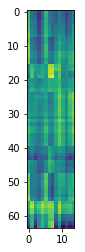

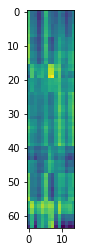

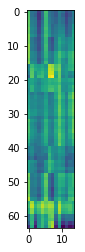

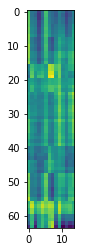

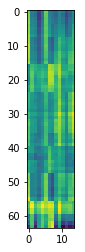

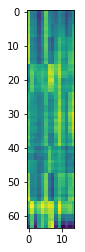

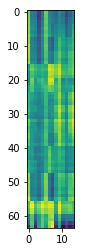

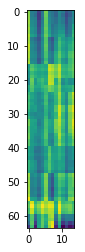

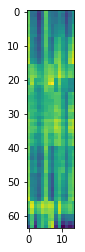

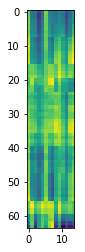

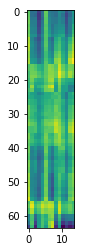

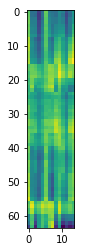

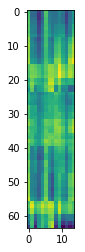

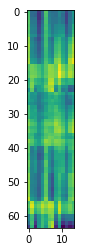

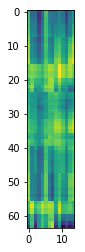

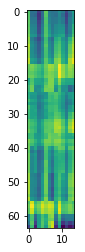

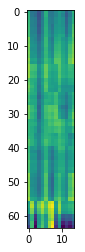

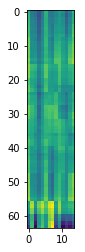

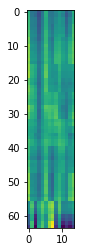

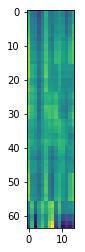

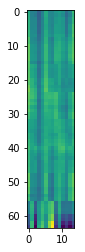

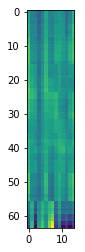

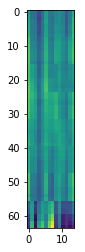

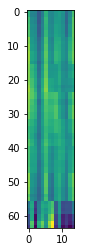

[(116.25, 201.765625, 0.01442439), (271.25, 179.953125, 0.017679827), (213.125, 98.15625, 0.0105913635), (280.9375, 174.5, 0.033304505), (280.9375, 179.953125, 0.031517133), (222.8125, 343.546875, 0.012055693), (280.9375, 174.5, 0.042105276), (280.9375, 169.046875, 0.050050765), (203.4375, 59.984375, 0.01370603), (213.125, 65.4375, 0.017854922), (164.6875, 119.96875, 0.012045261), (552.1875, 190.859375, 0.009289572), (213.125, 65.4375, 0.021043548), (203.4375, 59.984375, 0.022429628)]


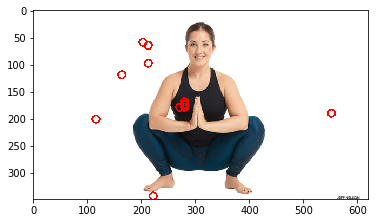

im00001.jpg


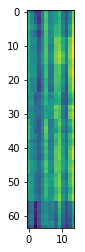

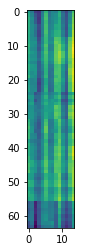

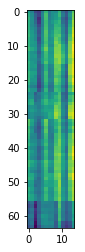

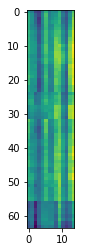

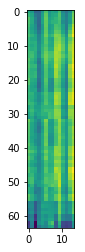

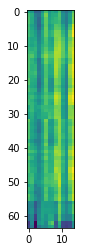

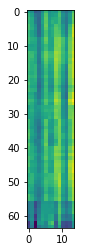

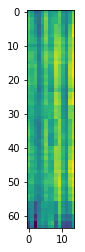

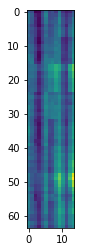

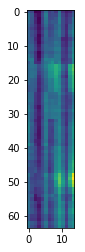

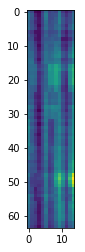

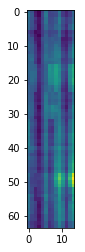

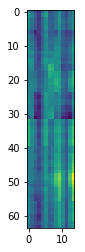

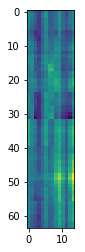

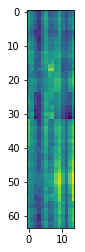

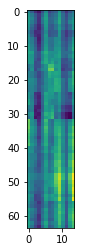

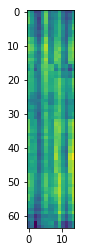

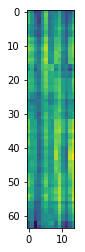

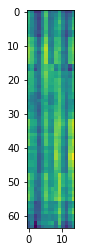

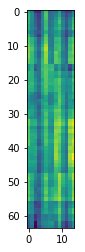

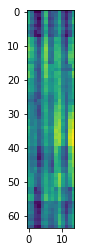

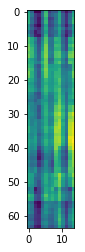

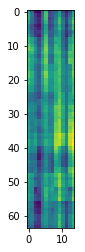

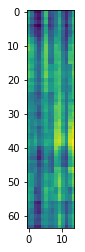

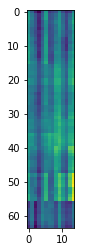

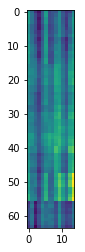

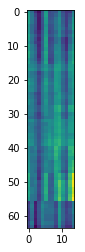

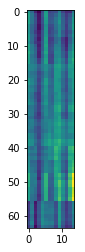

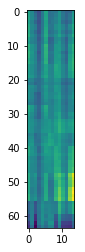

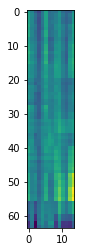

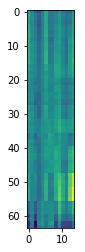

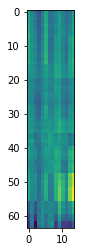

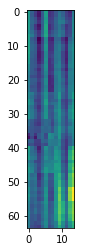

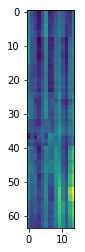

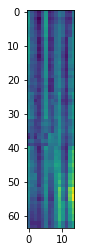

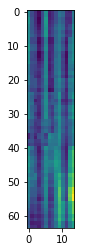

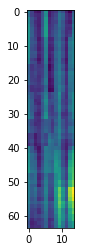

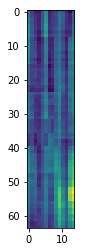

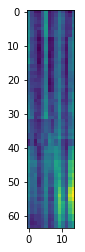

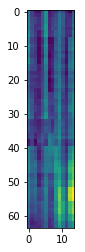

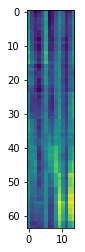

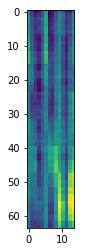

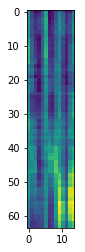

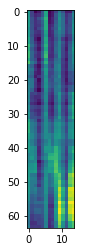

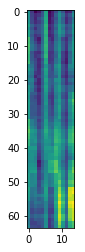

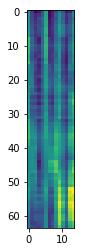

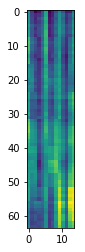

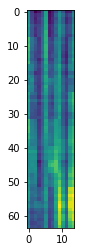

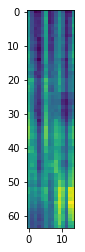

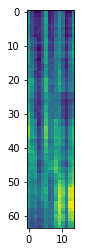

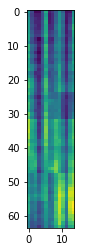

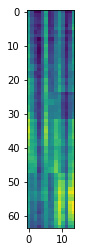

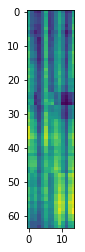

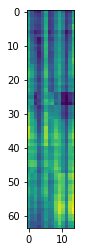

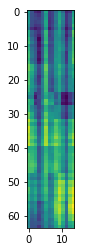

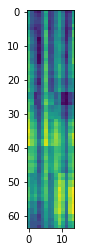

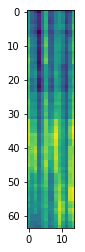

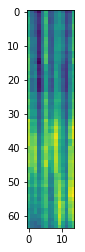

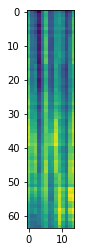

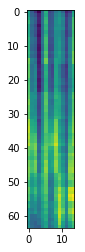

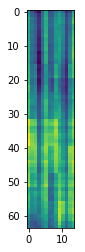

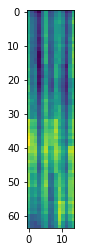

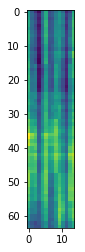

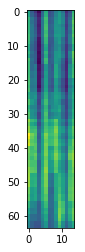

[(88.3125, 101.71875, 0.014254777), (88.3125, 101.71875, 0.01115421), (100.578125, 100.078125, 0.010832753), (127.5625, 95.15625, 0.004935601), (100.578125, 100.078125, 0.0086905435), (100.578125, 100.078125, 0.011604579), (90.765625, 100.078125, 0.009392078), (90.765625, 93.515625, 0.009597537), (90.765625, 93.515625, 0.012704984), (137.375, 65.625, 0.015457143), (130.015625, 80.390625, 0.011440094), (130.015625, 80.390625, 0.006373173), (132.46875, 63.984375, 0.017326288), (120.203125, 18.046875, 0.020242613)]


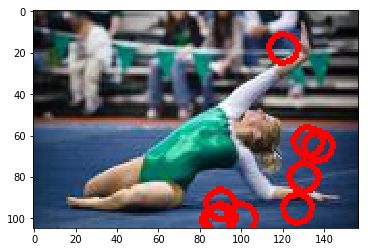

yoga1.jpg


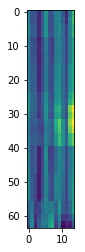

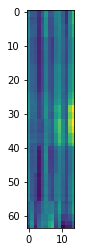

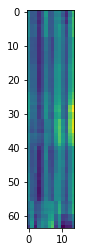

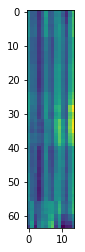

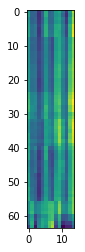

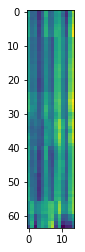

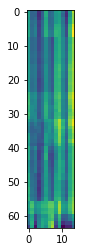

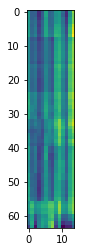

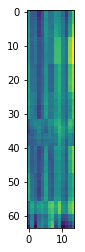

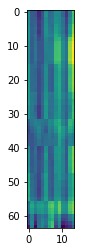

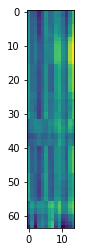

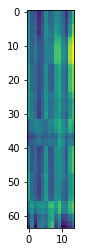

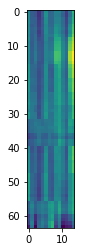

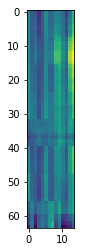

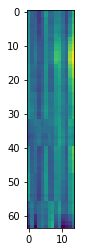

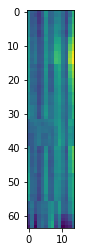

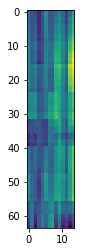

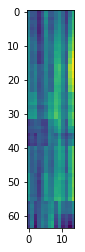

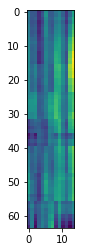

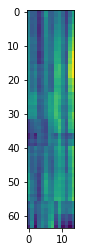

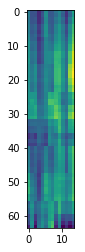

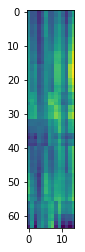

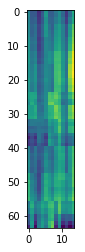

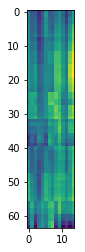

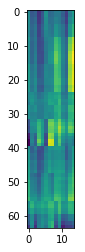

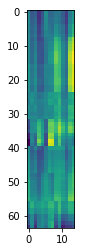

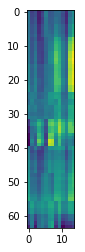

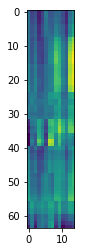

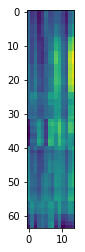

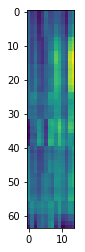

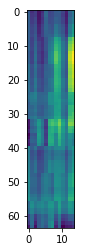

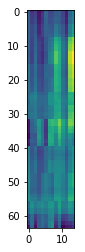

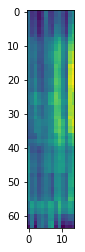

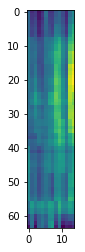

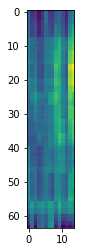

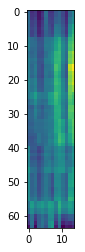

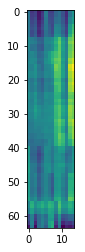

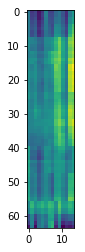

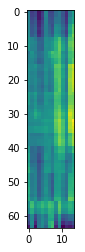

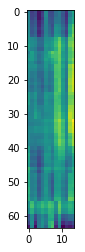

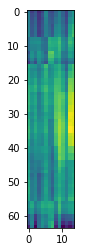

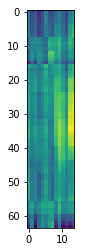

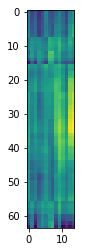

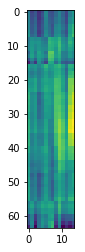

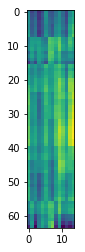

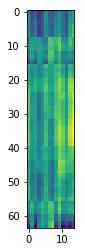

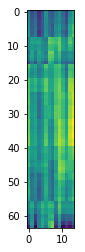

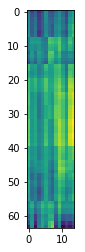

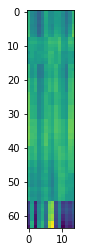

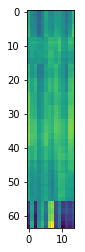

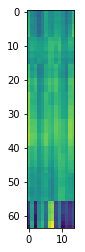

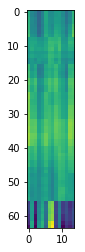

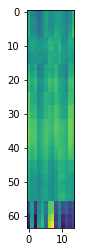

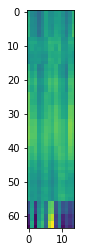

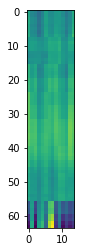

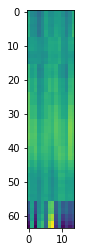

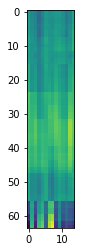

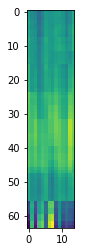

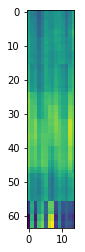

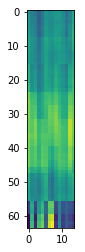

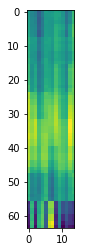

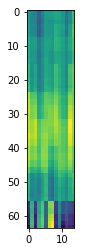

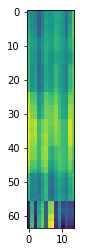

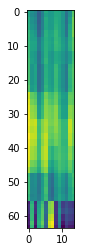

[(358.4375, 610.3125, 0.022357577), (358.4375, 610.3125, 0.018831963), (319.6875, 590.9375, 0.019887146), (368.125, 251.875, 0.018279215), (610.3125, 542.5, 0.018974638), (358.4375, 610.3125, 0.01878673), (610.3125, 542.5, 0.0269047), (610.3125, 532.8125, 0.034058534), (135.625, 290.625, 0.023723707), (319.6875, 290.625, 0.025359828), (319.6875, 300.3125, 0.016459273), (426.25, 552.1875, 0.01329095), (135.625, 290.625, 0.030644933), (135.625, 290.625, 0.03535451)]


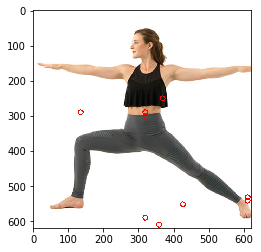

sample.jpg


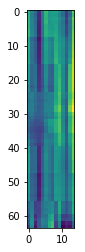

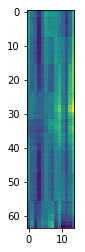

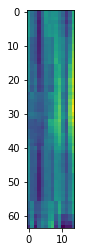

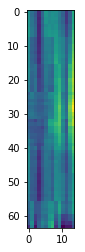

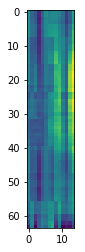

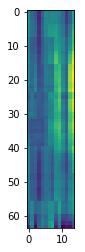

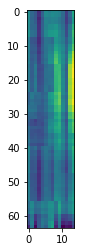

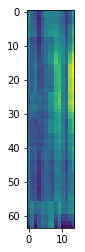

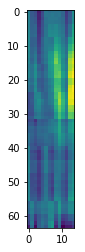

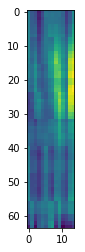

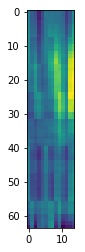

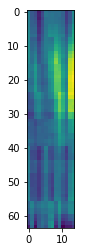

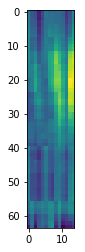

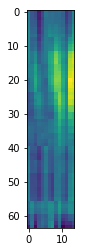

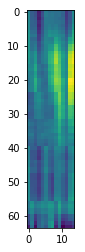

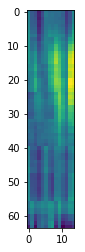

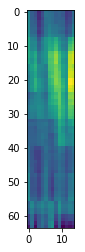

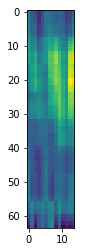

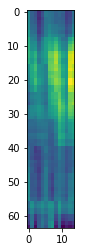

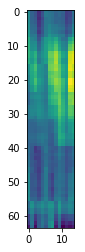

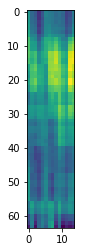

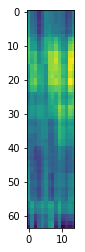

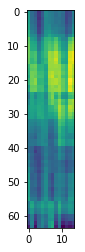

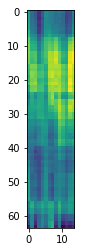

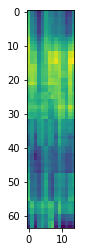

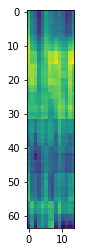

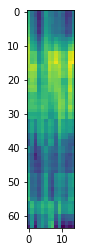

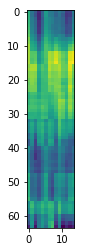

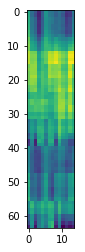

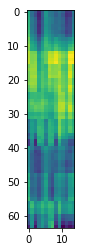

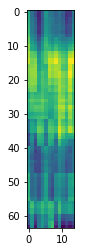

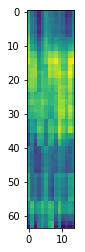

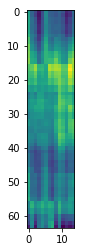

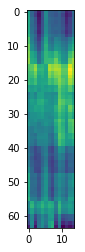

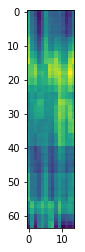

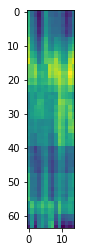

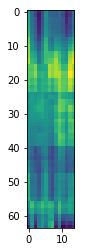

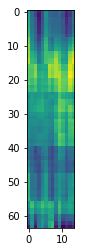

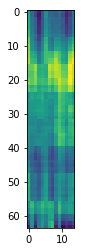

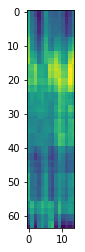

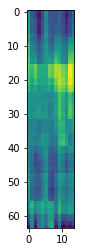

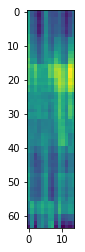

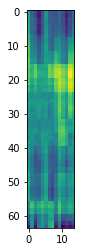

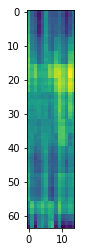

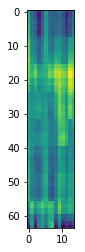

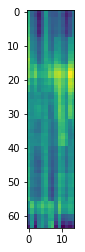

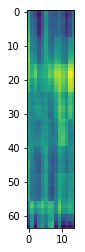

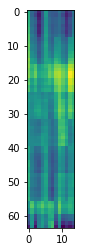

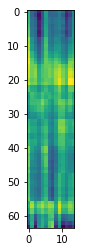

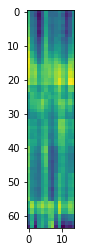

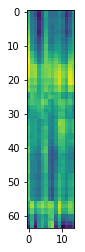

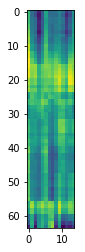

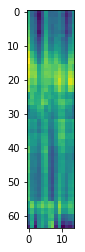

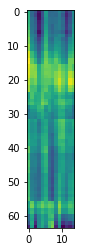

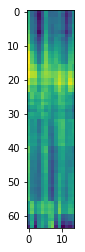

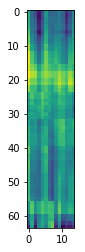

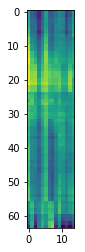

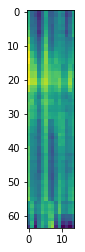

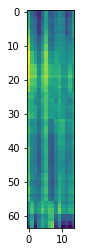

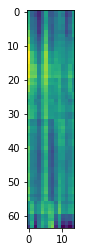

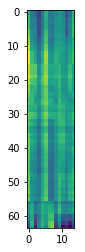

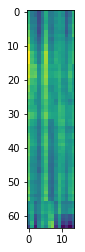

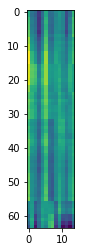

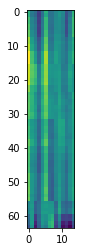

[(236.25, 765.0, 0.019752475), (320.625, 495.0, 0.018795425), (354.375, 495.0, 0.020225061), (320.625, 495.0, 0.015096918), (455.625, 652.5, 0.01543167), (202.5, 495.0, 0.015347206), (219.375, 405.0, 0.022791574), (286.875, 427.5, 0.023366723), (253.125, 382.5, 0.027630307), (405.0, 247.5, 0.024593536), (472.5, 405.0, 0.01961308), (337.5, 877.5, 0.016897999), (337.5, 382.5, 0.034154866), (337.5, 382.5, 0.032654062)]


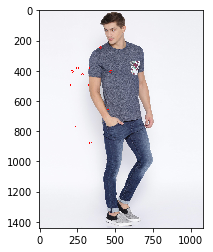

In [7]:
img_dir="../../data/test_images"

for file in os.listdir(img_dir):
    print(file)
    img_file=os.path.join(img_dir,file)
    out,scale = xnet.inference_file(img_file)

    kps = post_process_heatmap(out[0,:,:,:])
    for j in range(out[0].shape[0]):
        plt.imshow(out[0,j])
        plt.show()
    mkps = list() 
    for i, _kp in enumerate(kps):
        _conf = _kp[2]
        mkps.append((_kp[0]*scale[1]*4, _kp[1]*scale[0]*4, _conf))
    print(mkps)
    cvmat = render_joints(imageio.imread(img_file), mkps, conf_th=0.002)
    plt.imshow(cvmat)
    plt.show()
